<a href="https://colab.research.google.com/github/Harshavardhannadiveedi/DataScience/blob/main/DTBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#loading dataset
import pandas as pd
data=pd.read_csv("/content/heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [20]:
#@.Exploratory Data Analysis(EDA):
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [21]:
data.shape

(908, 13)

In [22]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [24]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [25]:
data = data.dropna(subset=['oldpeak'])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,reversable defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4


In [26]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [27]:
#renaming the target variable "num " with "target"  for better understanding
data.rename(columns={'num': 'target'}, inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler

target_col = 'target'

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop(target_col)
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [29]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,1.052849,Male,typical angina,0.652591,0.271960,True,lv hypertrophy,0.501387,FALSE,1.288612,downsloping,fixed defect,0
1,-1.366364,Male,atypical angina,0.132633,0.003114,False,normal,-0.201922,FALSE,-0.815249,flat,fixed defect,0
2,0.393064,Male,asymptomatic,0.392612,-0.095463,False,normal,0.423242,FALSE,-0.449360,flat,fixed defect,0
3,-0.156758,Male,typical angina,-0.751298,-0.149232,False,lv hypertrophy,2.064297,FALSE,-0.815249,flat,fixed defect,0
4,0.393064,Male,asymptomatic,-1.167265,-0.014809,False,normal,-0.436358,TRUE,0.556834,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,-0.266722,Male,asymptomatic,-1.167265,-1.816077,True,normal,-1.764831,FALSE,-0.815249,flat,reversable defect,4
902,0.942885,Male,asymptomatic,1.432530,0.460152,True,st-t abnormality,-1.139668,TRUE,1.928917,flat,fixed defect,4
903,-0.046793,Male,asymptomatic,-0.387326,-1.816077,False,normal,-0.670795,FALSE,0.556834,upsloping,reversable defect,4
904,0.942885,Male,asymptomatic,1.744505,-0.292616,False,st-t abnormality,-0.670795,TRUE,1.928917,flat,reversable defect,4


In [37]:
# Binary classification: 0 = no disease, 1 = disease
data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
data['target'].value_counts()

,count
target,
1,468
0,378


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['sex', 'fbs', 'exang']:
    data[col] = le.fit_transform(data[col])


In [60]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [61]:
data

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.052849,1,0.652591,0.271960,1,0.501387,0,1.288612,0,False,False,True,False,False,False,False,False,False
1,-1.366364,1,0.132633,0.003114,0,-0.201922,0,-0.815249,0,True,False,False,True,False,True,False,False,False
2,0.393064,1,0.392612,-0.095463,0,0.423242,0,-0.449360,0,False,False,False,True,False,True,False,False,False
3,-0.156758,1,-0.751298,-0.149232,0,2.064297,0,-0.815249,0,False,False,True,False,False,True,False,False,False
4,0.393064,1,-1.167265,-0.014809,0,-0.436358,1,0.556834,0,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,-0.266722,1,-1.167265,-1.816077,1,-1.764831,0,-0.815249,1,False,False,False,True,False,True,False,False,True
902,0.942885,1,1.432530,0.460152,1,-1.139668,1,1.928917,1,False,False,False,False,True,True,False,False,False
903,-0.046793,1,-0.387326,-1.816077,0,-0.670795,0,0.556834,1,False,False,False,True,False,False,True,False,True
904,0.942885,1,1.744505,-0.292616,0,-0.670795,1,1.928917,1,False,False,False,False,True,True,False,False,True


In [64]:
#Decision tree classifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [65]:

#Implement a Decision Tree Classification model using a library like scikit-learn.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
#Train the model on the training set and evaluate its performance on the testing set using appropriate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6941176470588235
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        80
           1       0.72      0.69      0.70        90

    accuracy                           0.69       170
   macro avg       0.69      0.69      0.69       170
weighted avg       0.70      0.69      0.69       170

Confusion Matrix:
 [[56 24]
 [28 62]]


In [67]:
#5. Hyperparameter Tuning:
#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different
#hyperparameters such as maximum depth, minimum samples split, and criterion.
from sklearn.model_selection import GridSearchCV

# Define grid of parameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [68]:
#hyperparameters such as maximum depth, minimum samples split, and criterion.
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))


Tuned Accuracy: 0.7352941176470589
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.69        80
           1       0.71      0.84      0.77        90

    accuracy                           0.74       170
   macro avg       0.74      0.73      0.73       170
weighted avg       0.74      0.74      0.73       170



In [52]:

#Evaluate the Tuned Model
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71        76
           1       0.78      0.66      0.72        94

    accuracy                           0.71       170
   macro avg       0.72      0.72      0.71       170
weighted avg       0.72      0.71      0.71       170



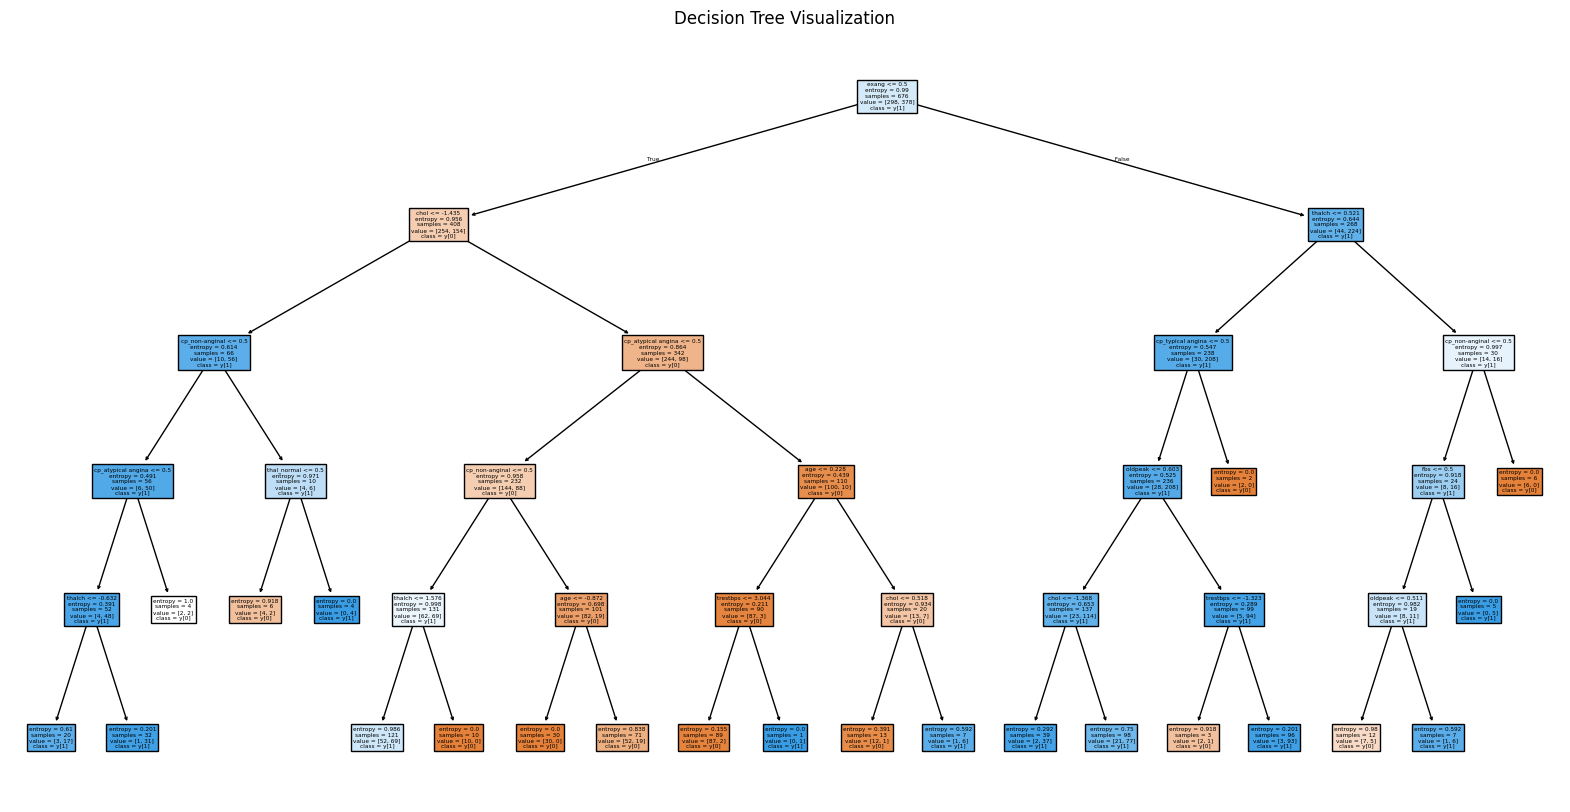

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


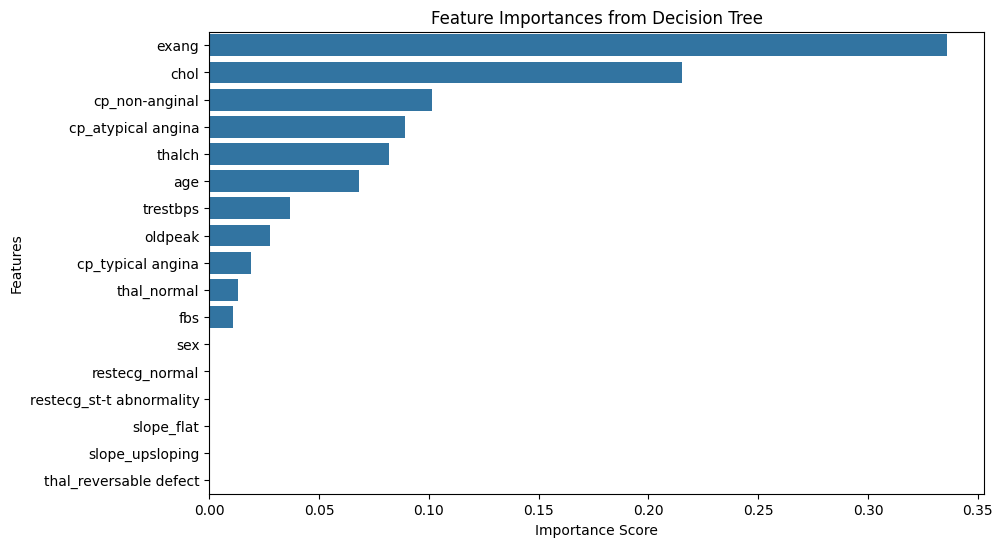

In [70]:
#Identify Important Features
import pandas as pd
import seaborn as sns
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [72]:

data['target'].value_counts(normalize=True)

,proportion
target,
1,0.553191
0,0.446809
